In [1]:
from pytrends.request import TrendReq
import pandas as pd

import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime, timedelta

%matplotlib inline
sns.set(style="white")

In [2]:
# Connect to Google
pytrend = TrendReq(hl='de-CH')
# pytrend = TrendReq(hl='en-US', tz=360)

In [15]:
# keyword = 'BTC to USD'
# coins = ['bitcoin', 'ethereum', 'litecoin', 'ripple']
coins = ['bitcoin', 'ethereum']
# for keyword in coins:

keyword = 'ethereum'

pytrend = TrendReq(hl='de-CH')

# time_set = ['2015-08-07 2016-04-12', 
#             '2016-04-13 2016-12-12',
#             '2016-12-13 2017-04-12',
#             '2017-04-13 2017-12-12',
#             '2017-12-13 2018-04-12'
#            ]

time_set = ['2015-08-07 2018-04-12']
    
results_df = pd.DataFrame()

# Google uses UTC
for time_dur in time_set:
    # Look for google search results world-wide
    pytrend.build_payload(kw_list=[keyword], timeframe=time_dur, geo='', gprop='')
    trend_df = pytrend.interest_over_time()
    times = time_dur.split()
    
    # Interest Over Time
    results_df = results_df.append(trend_df) #, ignore_index = True)

# print(len(results_df)
results_df.describe()

,ethereum
count,140.000000
mean,15.464286
std,21.485953
min,0.000000
25%,2.000000
50%,4.000000
75%,23.500000
max,100.000000


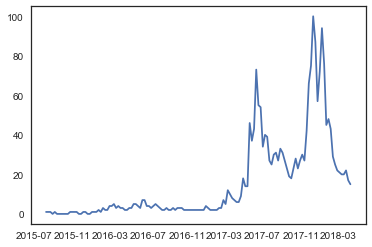

In [16]:
plt.plot(results_df['ethereum'])

In [11]:
# Return dataframe 
# generates per-day google trends data even when query duration is greater than 6 months
# Accumulates data by using multiple queries and scaling query results appropriately 
# by having overlapped dates in successive queries 
def get_trends_data (keyword, start_date, end_date, overlap):
    # this works as of 4/14 for at least the search terms I tried. Google trends might change its behavior
    max_delta = 180 # in days
    
    # Create time_set array
    time_set = []
    first = start_date
    last = start_date
    while last < end_date:
        last = min(end_date, first + timedelta(days=max_delta))
        time_set.append(first.strftime('%Y-%m-%d')+' '+last.strftime('%Y-%m-%d'))
        first = (last + timedelta(days=1)) - timedelta(days=overlap)
                  
    print (time_set)
    
    # Initialize output dataframe
    results_df = pd.DataFrame()

    # Skip re-scaling for the first iteration
    first_iter = 1

    for time_dur in time_set:
        pytrend.build_payload(kw_list=[keyword], timeframe=time_dur, geo='', gprop='')
        trend_df = pytrend.interest_over_time()
    
        if first_iter == 1:
            first_iter = 0
            overlap = 0
        else:
            overlap = (prev_end_date - trend_df.index[0]).days + 1
            print (overlap)
    
            if overlap < 1:
                print ("ERROR: Killing since overlap is not even one day: Overlap = ", overlap)
                exit(1)
            else:
                print ("Proceeding since overlap is ", overlap)
      
            if overlap > 1:
                prev_df = results_df.iloc[-1*overlap:][keyword]
                curr_df = trend_df.iloc[:overlap][keyword]
                scale_fac = np.mean(1.0*prev_df/curr_df)
                print (scale_fac)
            else:
                print ("Overlap is greater than 1. overlap = ", overlap)
        
            trend_df[keyword] *= scale_fac
    
        prev_end_date = trend_df.index[-1]
    
        # Interest Over Time
        results_df = results_df.append(trend_df.iloc[overlap:]) #, ignore_index = True)

    return results_df

In [7]:
start_date = datetime.strptime('2015-08-07', '%Y-%m-%d')
end_date = datetime.strptime('2018-04-12', '%Y-%m-%d')

overlap = 4

bitcoin_trends_df = get_trends_data('bitcoin', start_date, end_date, overlap)

['2015-08-07 2016-02-03', '2016-01-31 2016-07-29', '2016-07-26 2017-01-22', '2017-01-19 2017-07-18', '2017-07-15 2018-01-11', '2018-01-08 2018-04-12']
4
Proceeding since overlap is  4
1.182119021134594
4
Proceeding since overlap is  4
1.3995151655223177
4
Proceeding since overlap is  4
4.090323184135019
4
Proceeding since overlap is  4
25.54625952948612
4
Proceeding since overlap is  4
14.442432402510686


In [12]:
ethereum_trends_df = get_trends_data('ethereum', start_date, end_date, overlap)

['2015-08-07 2016-02-03', '2016-01-31 2016-07-29', '2016-07-26 2017-01-22', '2017-01-19 2017-07-18', '2017-07-15 2018-01-11', '2018-01-08 2018-04-12']
4
Proceeding since overlap is  4
6.034722222222221
4
Proceeding since overlap is  4
2.9500584461949506
4
Proceeding since overlap is  4
48.67596436221669
4
Proceeding since overlap is  4
64.53443177402822
4
Proceeding since overlap is  4
58.61695206195652


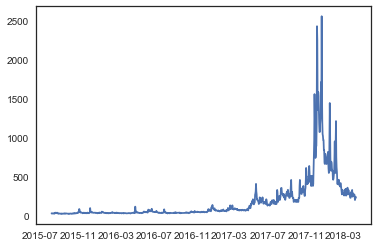

In [8]:
plt.plot(bitcoin_trends_df['bitcoin'])

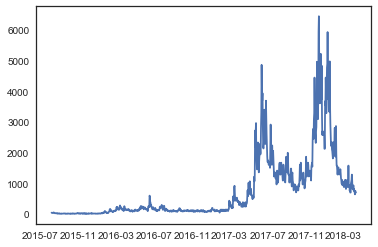

In [14]:
plt.plot(ethereum_trends_df['ethereum'])

In [ ]:
times = time_dur.split()
print (times)

pytrend.build_payload(kw_list=[keyword], timeframe='today 1-m', geo='CH', gprop='news')
trend_df = pytrend.interest_over_time()
print (trend_df)